In [ ]:
from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector, Parameter
import numpy as np
import math

import pickle

import sys
sys.path.append('../../../')
from src import customFunc as cf
from src import ansatzes as anz
from src import variances as var

from qiskit.quantum_info import SparsePauliOp

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

/home/dperezgcia/miniconda3/envs/qml_avoiding_bp/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


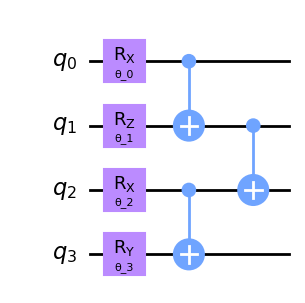

/home/dperezgcia/miniconda3/envs/qml_avoiding_bp/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


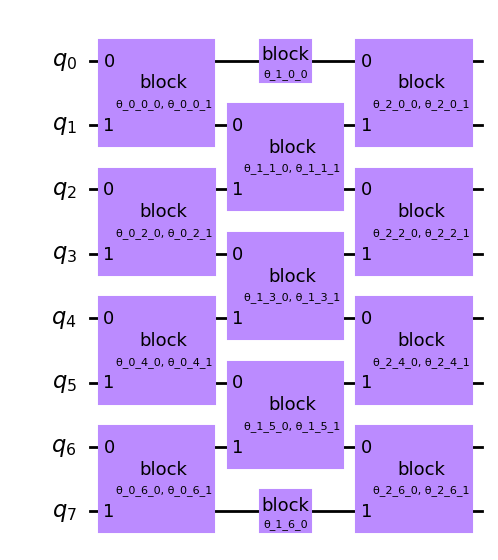

In [2]:
# Otro ansatz con más sentido

def block(n: int, param_prefix: str = "θ"):
    qc = QuantumCircuit(n)
    for i in range(n):
        aux = np.random.random()
        if aux < 1/3:
            qc.rx(Parameter(param_prefix + "_" + str(i)), i)
        elif aux < 2/3:
            qc.ry(Parameter(param_prefix + "_" + str(i)), i)
        else:
            qc.rz(Parameter(param_prefix + "_" + str(i)), i)

    for i in range(0, n-1, 2):
        qc.cx(i, i+1)
    for i in range(1, n-1, 2):
        qc.cx(i, i+1)
    qc.name = "block"
    return qc

def alt(l: int, n: int, m: int):
    if m % 2 != 0:
        raise Exception("Parameter `m` must be an even number")
    if n % m != 0:
        raise Exception("Parameter `n` divided by `m` must be integer")
    
    qc = QuantumCircuit(n)
    for i in range(l):
        if (i + 1) % 2 == 0:
            qc.append(block(m//2, param_prefix=f"θ_{i}_0"), range(0, m//2))
            for j in range(m//2, n-m//2, m):
                qc.append(block(m, param_prefix=f"θ_{i}_{j}"), range(j, j+m))
            qc.append(block(m//2, param_prefix=f"θ_{i}_{j+1}"), range(n-m//2, n))
        else:
            for j in range(0, n, m):
                qc.append(block(m, param_prefix=f"θ_{i}_{j}"), range(j, j+m))
    return qc

def build_ala_ansatz(num_qubits):
    ansatz = alt(3, num_qubits, 2)
    return ansatz, ansatz.num_parameters

display(block(4).draw("mpl"))
display(alt(3, 8, 2).draw("mpl"))

## Alternating Layered Ansatz (Local Observable)


Calculando varianzas con 4 qubits.

Varianza del valor esperado: 0.10071952791617683
Varianza de la derivada: 9.739736178483909e-33

Calculando varianzas con 6 qubits.

Varianza del valor esperado: 0.5079352197757137
Varianza de la derivada: 1.546744461438074e-32

Calculando varianzas con 8 qubits.

Varianza del valor esperado: 0.22003467470925692
Varianza de la derivada: 9.203631173541392e-33

Calculando varianzas con 10 qubits.

Varianza del valor esperado: 0.32772284513545524
Varianza de la derivada: 1.3356818511421755e-32

Calculando varianzas con 12 qubits.

Varianza del valor esperado: 0.10547007063294683
Varianza de la derivada: 1.8857008730901603e-33

Calculando varianzas con 14 qubits.

Varianza del valor esperado: 0.12764544260351607
Varianza de la derivada: 3.452742085848307e-32

Calculando varianzas con 16 qubits.

Varianza del valor esperado: 0.38464171088454874
Varianza de la derivada: 9.296935920088476e-33

Calculando varianzas con 18 qubits.

Varianza del valor esperad

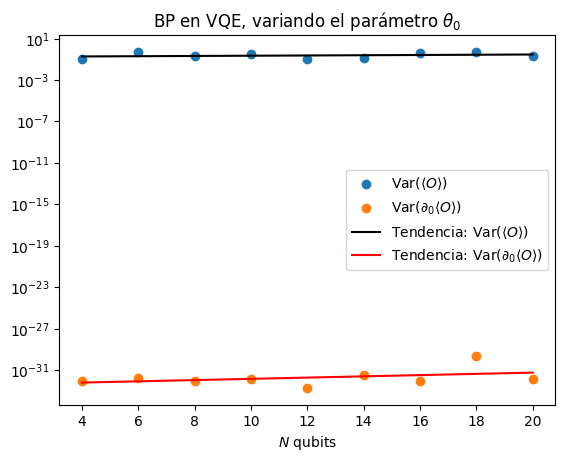

In [ ]:
# Log scale

data_local = []
obs  = SparsePauliOp.from_list([("ZZ",1)])

data_local = var.variance_vs_nQubits(build_ala_ansatz, 4, 20, obs, 0, 100, print_info=True, plot_info=True, do_regress=True, only_even_qubits=True)

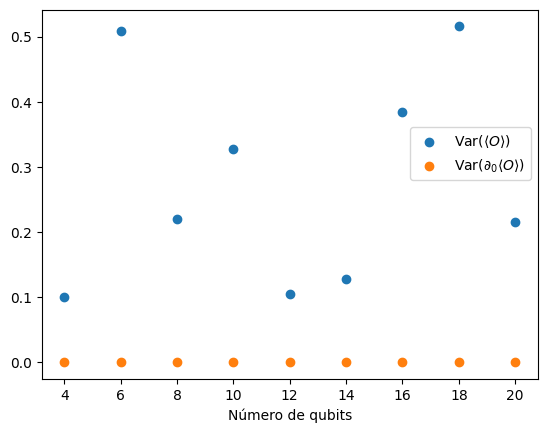

In [59]:
import matplotlib.pyplot as plt

plt.scatter(data["n_qubits"], data["var_value"], label=r"Var($\langle O\rangle$)")
plt.scatter(data["n_qubits"], data["var_deriv"], label=rf"Var($\partial_0\langle O\rangle$)")

plt.xlabel("Número de qubits")

plt.legend(loc="upper right", bbox_to_anchor=(1.0, 0.7))
plt.show()


## Alternating Layered Ansatz (Semi-Global Observable: H2)


Calculando varianzas con 4 qubits.

Varianza del valor esperado: 0.05713865759048521
Varianza de la derivada: 0.03621718828331316

Calculando varianzas con 6 qubits.

Varianza del valor esperado: 0.04807830096437548
Varianza de la derivada: 0.003564933260222976

Calculando varianzas con 8 qubits.

Varianza del valor esperado: 0.05597711282430016
Varianza de la derivada: 1.2299065662054662e-32

Calculando varianzas con 10 qubits.

Varianza del valor esperado: 0.05659038245433548
Varianza de la derivada: 2.2892065542173343e-32

Calculando varianzas con 12 qubits.

Varianza del valor esperado: 0.05503670334461305
Varianza de la derivada: 3.529990772748699e-32

Calculando varianzas con 14 qubits.

Varianza del valor esperado: 0.058368845397027996
Varianza de la derivada: 1.1770790782029022e-31

Pendiente para valor esperado: 0.007470157857882668.
R^2 para valor esperado: 0.16150003645429775.

Pendiente para derivada: -7.703251261547938.
R^2 para derivada: 0.6728518125320085.


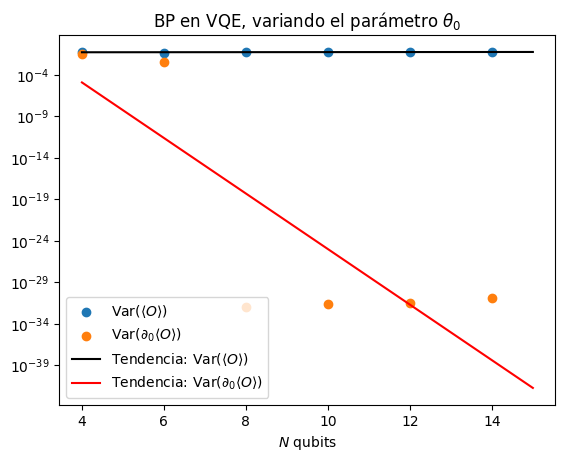


Calculando varianzas con 4 qubits.

Varianza del valor esperado: 0.06458006186596686
Varianza de la derivada: 0.026231198760760806

Calculando varianzas con 6 qubits.

Varianza del valor esperado: 0.04129266922448654
Varianza de la derivada: 0.004704801837937554

Calculando varianzas con 8 qubits.

Varianza del valor esperado: 0.04497606298378558
Varianza de la derivada: 1.3834648125313493e-32

Calculando varianzas con 10 qubits.

Varianza del valor esperado: 0.04675489819377539
Varianza de la derivada: 1.808609995894943e-32

Calculando varianzas con 12 qubits.

Varianza del valor esperado: 0.06565353467624341
Varianza de la derivada: 3.795900068310357e-32

Calculando varianzas con 14 qubits.

Varianza del valor esperado: 0.05497182694550186
Varianza de la derivada: 1.3792208333058979e-31

Pendiente para valor esperado: 0.008921192105096936.
R^2 para valor esperado: 0.029349877844060263.

Pendiente para derivada: -7.682714124948031.
R^2 para derivada: 0.6703526445271493.


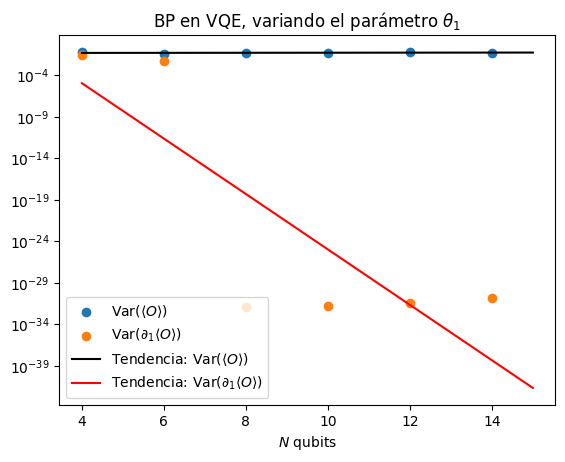


Calculando varianzas con 4 qubits.

Varianza del valor esperado: 0.08221660747134132
Varianza de la derivada: 0.033438259729664896

Calculando varianzas con 6 qubits.

Varianza del valor esperado: 0.05677740058336549
Varianza de la derivada: 0.026240562017616778

Calculando varianzas con 8 qubits.

Varianza del valor esperado: 0.043206612652200896
Varianza de la derivada: 0.0016608718198525612

Calculando varianzas con 10 qubits.

Varianza del valor esperado: 0.041569628943438935
Varianza de la derivada: 1.6400911257610596e-32

Calculando varianzas con 12 qubits.

Varianza del valor esperado: 0.07513105623184516
Varianza de la derivada: 0.022436595907017874

Calculando varianzas con 14 qubits.

Varianza del valor esperado: 0.04591354419813426
Varianza de la derivada: 0.0162764567710264

Pendiente para valor esperado: -0.030161752072438573.
R^2 para valor esperado: 0.1485007202187403.

Pendiente para derivada: -1.012247183404524.
R^2 para derivada: 0.018094478858027643.


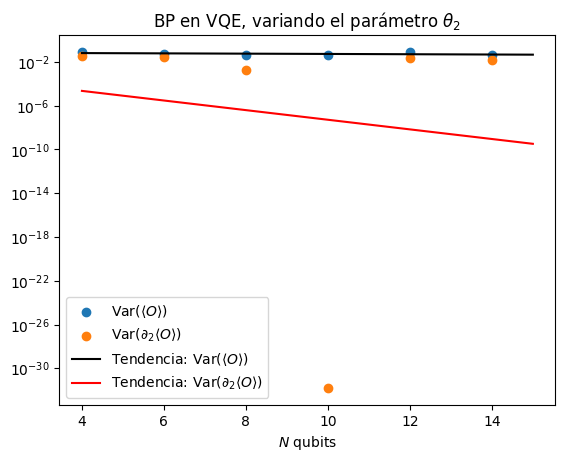


Calculando varianzas con 4 qubits.

Varianza del valor esperado: 0.06982456714782968
Varianza de la derivada: 0.02590499716474417

Calculando varianzas con 6 qubits.

Varianza del valor esperado: 0.05342109887155324
Varianza de la derivada: 0.020399424926680093

Calculando varianzas con 8 qubits.

Varianza del valor esperado: 0.05020578003088197
Varianza de la derivada: 0.005756344477114836

Calculando varianzas con 10 qubits.

Varianza del valor esperado: 0.058152752202105536
Varianza de la derivada: 2.197185621474512e-32

Calculando varianzas con 12 qubits.

Varianza del valor esperado: 0.04540631195458304
Varianza de la derivada: 0.019648011179786463

Calculando varianzas con 14 qubits.

Varianza del valor esperado: 0.06276455906352442
Varianza de la derivada: 0.02013610726484877

Pendiente para valor esperado: -0.012481394774789819.
R^2 para valor esperado: 0.08995493908198611.

Pendiente para derivada: -0.9872898764426613.
R^2 para derivada: 0.017297641050794604.


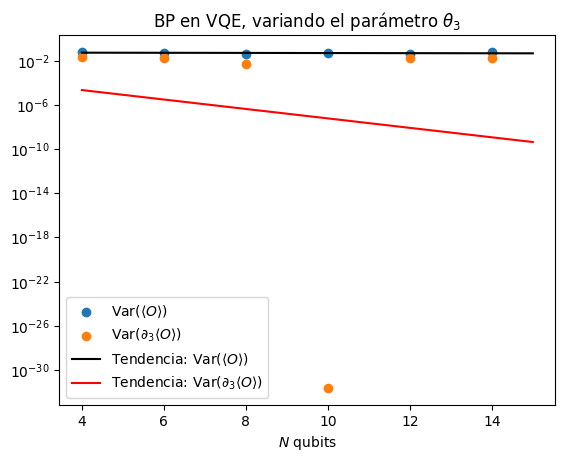


Calculando varianzas con 4 qubits.

Varianza del valor esperado: 0.0741151309889018
Varianza de la derivada: 0.02954991310225397

Calculando varianzas con 6 qubits.

Varianza del valor esperado: 0.04205999670266655
Varianza de la derivada: 0.0226868891653581

Calculando varianzas con 8 qubits.

Varianza del valor esperado: 0.054337013532132425
Varianza de la derivada: 0.021647683171772156

Calculando varianzas con 10 qubits.

Varianza del valor esperado: 0.04518592068661318
Varianza de la derivada: 0.0020181236400471873

Calculando varianzas con 12 qubits.

Varianza del valor esperado: 0.05557589572677581
Varianza de la derivada: 4.119949337033176e-32

Calculando varianzas con 14 qubits.

Varianza del valor esperado: 0.05024192466909052
Varianza de la derivada: 0.022724005706393262

Pendiente para valor esperado: -0.0184616003673421.
R^2 para valor esperado: 0.1212022986691791.

Pendiente para derivada: -2.987553812692523.
R^2 para derivada: 0.1617387866273131.


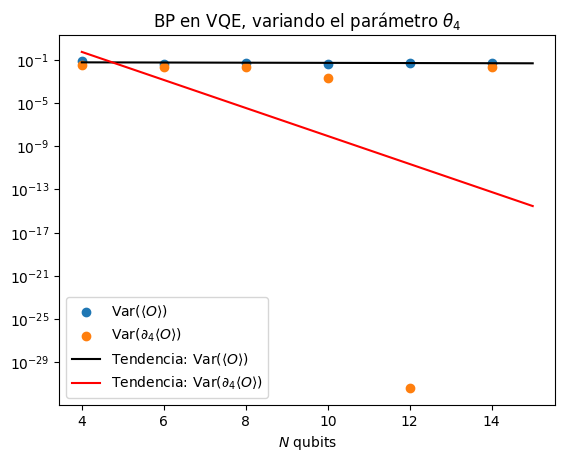


Calculando varianzas con 4 qubits.

Varianza del valor esperado: 0.062090332417961254
Varianza de la derivada: 0.02772574657401158

Calculando varianzas con 6 qubits.

Varianza del valor esperado: 0.04410115999604819
Varianza de la derivada: 0.02510432092861485

Calculando varianzas con 8 qubits.

Varianza del valor esperado: 0.05969771523027961
Varianza de la derivada: 0.015449525128482073

Calculando varianzas con 10 qubits.

Varianza del valor esperado: 0.0513663593220103
Varianza de la derivada: 0.008449264665889899

Calculando varianzas con 12 qubits.

Varianza del valor esperado: 0.05430180698471009
Varianza de la derivada: 5.572031181623153e-32

Calculando varianzas con 14 qubits.

Varianza del valor esperado: 0.050676667551791975
Varianza de la derivada: 0.019530412274097186

Pendiente para valor esperado: -0.007738850378193808.
R^2 para valor esperado: 0.05494905505926861.

Pendiente para derivada: -2.9599455136617094.
R^2 para derivada: 0.15942555204601375.


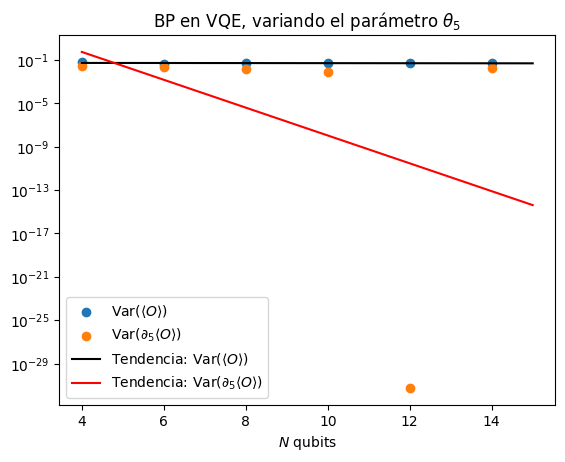


Calculando varianzas con 4 qubits.

Varianza del valor esperado: 0.05329777383771594
Varianza de la derivada: 0.03454751730537897

Calculando varianzas con 6 qubits.

Varianza del valor esperado: 0.05998752683198482
Varianza de la derivada: 6.149417275230668e-33

Calculando varianzas con 8 qubits.

Varianza del valor esperado: 0.06944693049663136
Varianza de la derivada: 0.03139315440393798

Calculando varianzas con 10 qubits.

Varianza del valor esperado: 0.05695146997179104
Varianza de la derivada: 0.019386561467195113

Calculando varianzas con 12 qubits.

Varianza del valor esperado: 0.05544383287762392
Varianza de la derivada: 4.1092007220135496e-32

Calculando varianzas con 14 qubits.

Varianza del valor esperado: 0.049842553479577806
Varianza de la derivada: 1.3497987867314828e-31

Pendiente para valor esperado: -0.01099698790889651.
R^2 para valor esperado: 0.1305497882855062.

Pendiente para derivada: -4.762249351657621.
R^2 para derivada: 0.22267926178050718.


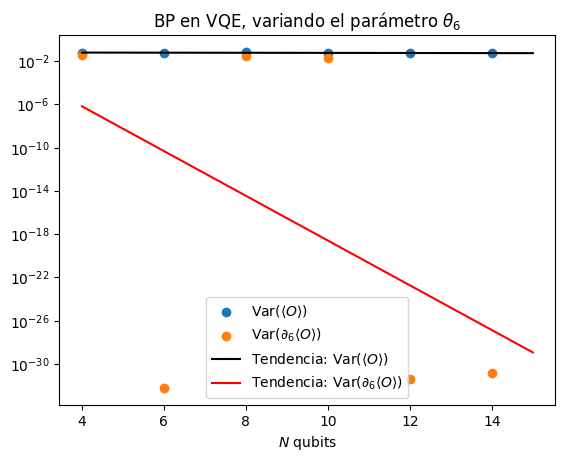


Calculando varianzas con 4 qubits.

Varianza del valor esperado: 0.062061816092897654
Varianza de la derivada: 0.02601328062835351

Calculando varianzas con 6 qubits.

Varianza del valor esperado: 0.04734194389250252
Varianza de la derivada: 0.007624897341400216

Calculando varianzas con 8 qubits.

Varianza del valor esperado: 0.0499779504523204
Varianza de la derivada: 0.021519104777623022

Calculando varianzas con 10 qubits.

Varianza del valor esperado: 0.04218156403759379
Varianza de la derivada: 0.02294764085411598

Calculando varianzas con 12 qubits.

Varianza del valor esperado: 0.05129322074882702
Varianza de la derivada: 4.0312872261133655e-32

Calculando varianzas con 14 qubits.

Varianza del valor esperado: 0.0548491698737068
Varianza de la derivada: 1.042962516886625e-31

Pendiente para valor esperado: -0.007811888950672431.
R^2 para valor esperado: 0.04976648613216632.

Pendiente para derivada: -7.723103589924002.
R^2 para derivada: 0.6814860208908596.


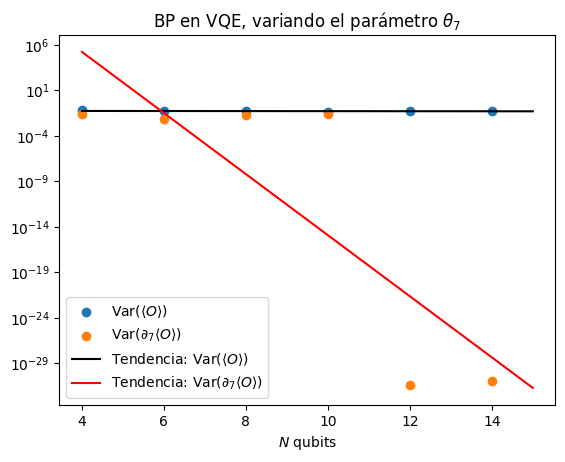


Calculando varianzas con 4 qubits.

Varianza del valor esperado: 0.0708069668146111
Varianza de la derivada: 0.03074137078487638

Calculando varianzas con 6 qubits.

Varianza del valor esperado: 0.04397585646783942
Varianza de la derivada: 0.028302907796746442

Calculando varianzas con 8 qubits.

Varianza del valor esperado: 0.0514639408777016
Varianza de la derivada: 6.815866073186429e-33

Calculando varianzas con 10 qubits.

Varianza del valor esperado: 0.05246261782388854
Varianza de la derivada: 0.029159899648001586

Calculando varianzas con 12 qubits.

Varianza del valor esperado: 0.04018423863057527
Varianza de la derivada: 0.004458042984045354

Calculando varianzas con 14 qubits.

Varianza del valor esperado: 0.05157330953217249
Varianza de la derivada: 1.1936913795312087e-31

Pendiente para valor esperado: -0.026229197921029793.
R^2 para valor esperado: 0.25693774816583204.

Pendiente para derivada: -3.908833957730107.
R^2 para derivada: 0.17009209881506532.


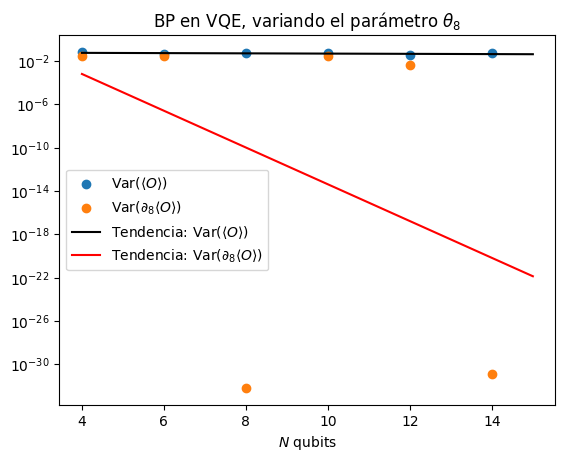


Calculando varianzas con 4 qubits.

Varianza del valor esperado: 0.07331836996769209
Varianza de la derivada: 0.01666604993627776

Calculando varianzas con 6 qubits.

Varianza del valor esperado: 0.05053866677919676
Varianza de la derivada: 0.02845682277347878

Calculando varianzas con 8 qubits.

Varianza del valor esperado: 0.04899829534838795
Varianza de la derivada: 7.8346059765695e-33

Calculando varianzas con 10 qubits.

Varianza del valor esperado: 0.062215032432682144
Varianza de la derivada: 0.021091275008156277

Calculando varianzas con 12 qubits.

Varianza del valor esperado: 0.04623210099442241
Varianza de la derivada: 0.007804612381230734

Calculando varianzas con 14 qubits.

Varianza del valor esperado: 0.05928152219441185
Varianza de la derivada: 1.5403710954725552e-31

Pendiente para valor esperado: -0.015584993374452587.
R^2 para valor esperado: 0.11183248593880353.

Pendiente para derivada: -3.8297403187014196.
R^2 para derivada: 0.1647018340741544.


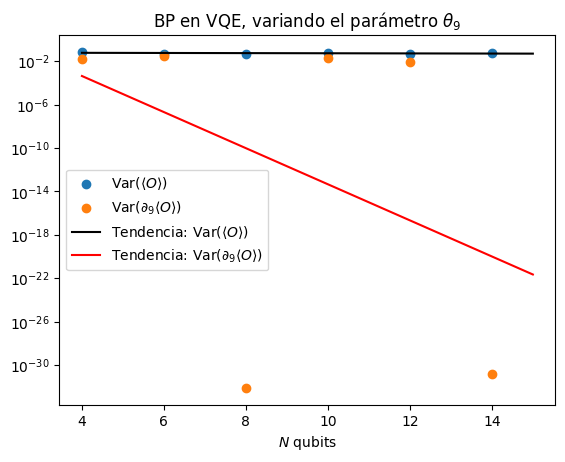


Calculando varianzas con 4 qubits.

Varianza del valor esperado: 0.05970035552557199
Varianza de la derivada: 0.037380807334767896

Calculando varianzas con 6 qubits.

Varianza del valor esperado: 0.05048240994158815
Varianza de la derivada: 0.030984412680403185

Calculando varianzas con 8 qubits.

Varianza del valor esperado: 0.04939809747863648
Varianza de la derivada: 1.0170142701529012e-32

Calculando varianzas con 10 qubits.

Varianza del valor esperado: 0.05041670907846409
Varianza de la derivada: 4.8264574778321895e-33

Calculando varianzas con 12 qubits.

Varianza del valor esperado: 0.047734391198686416
Varianza de la derivada: 0.018479407431395367

Calculando varianzas con 14 qubits.

Varianza del valor esperado: 0.03341613486878745
Varianza de la derivada: 1.230086833248261e-31

Pendiente para valor esperado: -0.0435571901882176.
R^2 para valor esperado: 0.7198937224261979.

Pendiente para derivada: -4.8818300210080245.
R^2 para derivada: 0.23006453671114022.


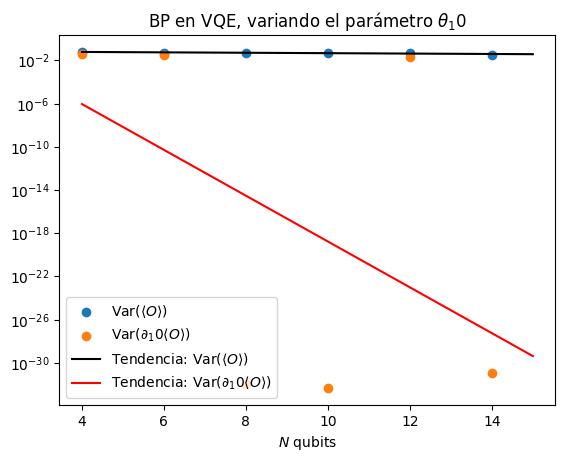


Calculando varianzas con 4 qubits.

Varianza del valor esperado: 0.07990174742371785
Varianza de la derivada: 0.019838123432921115

Calculando varianzas con 6 qubits.

Varianza del valor esperado: 0.04551056597195368
Varianza de la derivada: 0.018252100455786142

Calculando varianzas con 8 qubits.

Varianza del valor esperado: 0.053260471274545876
Varianza de la derivada: 0.007670788646751529

Calculando varianzas con 10 qubits.

Varianza del valor esperado: 0.05640328423492716
Varianza de la derivada: 2.0798425618228857e-32

Calculando varianzas con 12 qubits.

Varianza del valor esperado: 0.06253767999978752
Varianza de la derivada: 0.019173608781397997

Calculando varianzas con 14 qubits.

Varianza del valor esperado: 0.060397154906872724
Varianza de la derivada: 1.8325077050168777e-31

Pendiente para valor esperado: -0.005549592076672592.
R^2 para valor esperado: 0.012269202773042632.

Pendiente para derivada: -5.7457692120238075.
R^2 para derivada: 0.378251974743377.


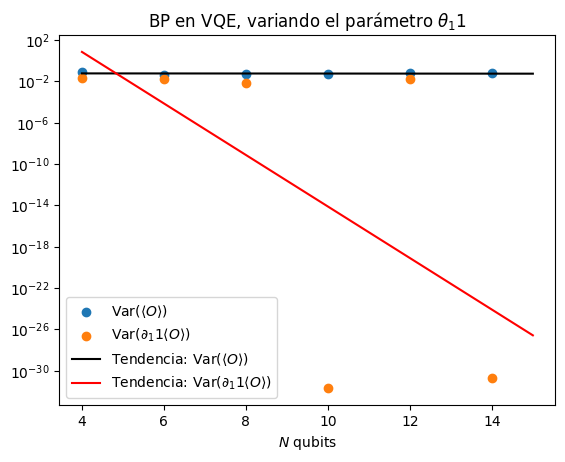

In [188]:
with open("data/H2_hamiltonian.pkl", "rb") as f:
    obs = pickle.load(f)

data_h2 = []

for i in np.linspace(0,11,12):
    data_h2.append(var.variance_vs_nQubits(build_ala_ansatz, 4, 15, obs, int(i), 100, print_info=True, plot_info=True, do_regress=True, only_even_qubits=True))


Preparando ejecución para 4 qubits.
Se usarán 12 parámetros


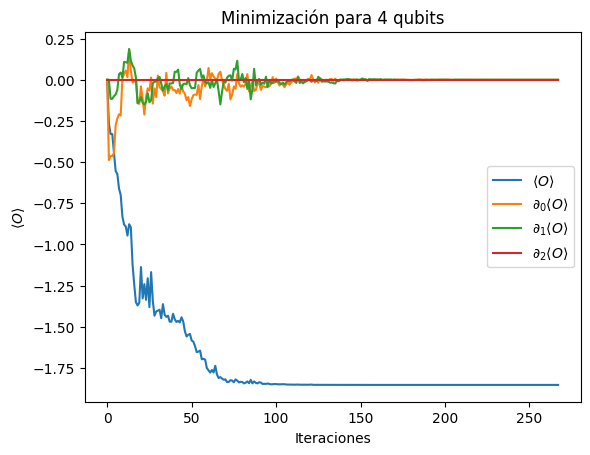

Fin ejecución con 4 qubits. Mínimo encontrado: -1.8537095108547814


{'n_qubits': [4], 'minimum_values': [-1.8537095108547814]}

In [33]:
# Estudiamos la eficacia el ansatz de cara a estimar la energía mínima de la molécula de hidrógeno

with open("data/H2_hamiltonian.pkl", "rb") as f:
    obs = pickle.load(f)

cf.VQE_minimization_BP(build_ala_ansatz, 4, 4, obs, index=[0,1,2])

## Alternating Layered Ansatz (Global Observable)


Calculando varianzas con 4 qubits.

Varianza del valor esperado: 0.0070556662928574695
Varianza de la derivada: 0.00364894922684933

Calculando varianzas con 6 qubits.

Varianza del valor esperado: 0.0005469477812624152
Varianza de la derivada: 0.00025929692802494395

Calculando varianzas con 8 qubits.

Varianza del valor esperado: 8.449467511033896e-05
Varianza de la derivada: 5.483815886450441e-33

Calculando varianzas con 10 qubits.

Varianza del valor esperado: 3.747052654540852e-06
Varianza de la derivada: 2.1758816427386503e-06

Calculando varianzas con 12 qubits.

Varianza del valor esperado: 2.6104967543509166e-06
Varianza de la derivada: 3.6578678261207503e-07

Calculando varianzas con 14 qubits.

Varianza del valor esperado: 4.2232453736537855e-07
Varianza de la derivada: 6.064364878065521e-08

Pendiente para valor esperado: -0.9681142134217934.
R^2 para valor esperado: 0.9688389101891028.

Pendiente para derivada: -0.1924325679882087.
R^2 para derivada: 0.000773376824736270

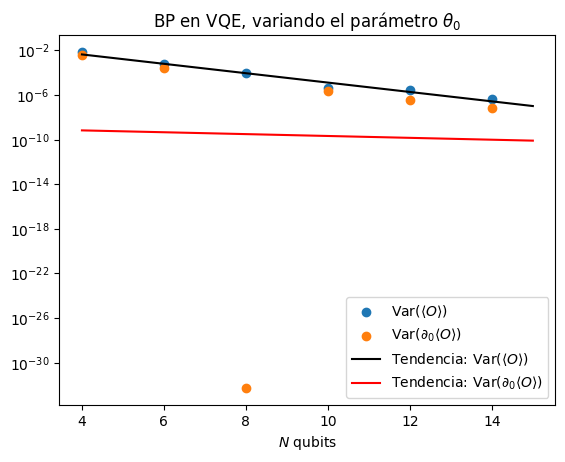


Calculando varianzas con 4 qubits.

Varianza del valor esperado: 0.00727428656834071
Varianza de la derivada: 4.773532922960428e-33

Calculando varianzas con 6 qubits.

Varianza del valor esperado: 0.0006133090639406303
Varianza de la derivada: 0.00016123759720114563

Calculando varianzas con 8 qubits.

Varianza del valor esperado: 2.3401121818273485e-05
Varianza de la derivada: 1.2186863277192939e-05

Calculando varianzas con 10 qubits.

Varianza del valor esperado: 3.387559937488014e-05
Varianza de la derivada: 1.824750334840603e-05

Calculando varianzas con 12 qubits.

Varianza del valor esperado: 2.5118775436576235e-07
Varianza de la derivada: 2.8734308624519923e-08

Calculando varianzas con 14 qubits.

Varianza del valor esperado: 6.74557020811973e-09
Varianza de la derivada: 3.554405870581822e-09

Pendiente para valor esperado: -1.3212315875191007.
R^2 para valor esperado: 0.9477912100070932.

Pendiente para derivada: 3.5620251368377707.
R^2 para derivada: 0.2800141135175482.


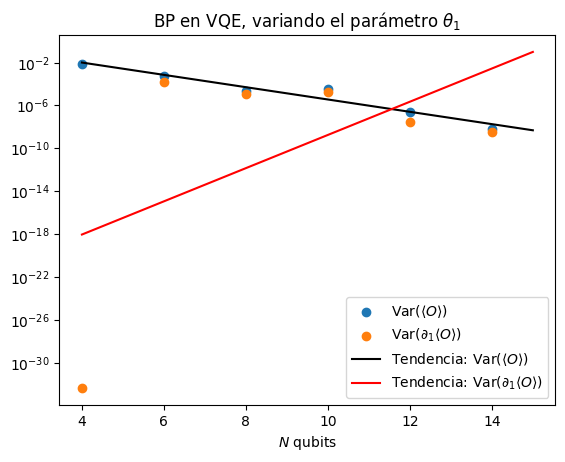


Calculando varianzas con 4 qubits.

Varianza del valor esperado: 0.010140105739464412
Varianza de la derivada: 0.0044608684898173575

Calculando varianzas con 6 qubits.

Varianza del valor esperado: 0.0025488117045238327
Varianza de la derivada: 0.0003954836973665143

Calculando varianzas con 8 qubits.

Varianza del valor esperado: 7.60405929808386e-05
Varianza de la derivada: 1.581370348491388e-05

Calculando varianzas con 10 qubits.

Varianza del valor esperado: 2.735564672773727e-06
Varianza de la derivada: 1.9508049533162555e-06

Calculando varianzas con 12 qubits.

Varianza del valor esperado: 1.6023505006135383e-07
Varianza de la derivada: 5.116502527456906e-33

Calculando varianzas con 14 qubits.

Varianza del valor esperado: 1.6651911039689615e-08
Varianza de la derivada: 3.235254157779454e-33

Pendiente para valor esperado: -1.4135119636476075.
R^2 para valor esperado: 0.9902165058638007.

Pendiente para derivada: -7.837698379740691.
R^2 para derivada: 0.7535134458680841.


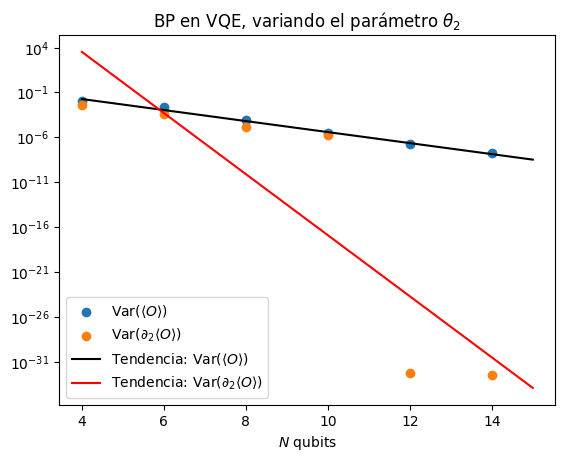


Calculando varianzas con 4 qubits.

Varianza del valor esperado: 0.011090981146489718
Varianza de la derivada: 0.0031878870034718638

Calculando varianzas con 6 qubits.

Varianza del valor esperado: 0.0012088909108543397
Varianza de la derivada: 0.0003329575172944692

Calculando varianzas con 8 qubits.

Varianza del valor esperado: 0.0001883056310733355
Varianza de la derivada: 5.7653073409449836e-05

Calculando varianzas con 10 qubits.

Varianza del valor esperado: 7.318884036411729e-06
Varianza de la derivada: 5.708856628566268e-06

Calculando varianzas con 12 qubits.

Varianza del valor esperado: 2.482559936131349e-06
Varianza de la derivada: 3.0380389314742013e-33

Calculando varianzas con 14 qubits.

Varianza del valor esperado: 1.3622732532945429e-08
Varianza de la derivada: 1.562049967987322e-08

Pendiente para valor esperado: -1.2837375448903454.
R^2 para valor esperado: 0.9658361035375246.

Pendiente para derivada: -3.772052129842671.
R^2 para derivada: 0.28311219962723155.


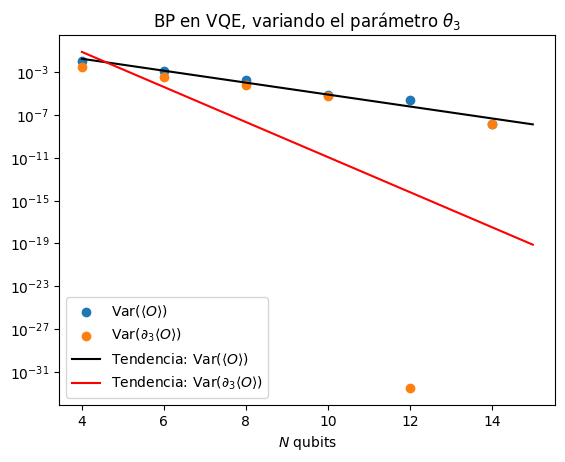


Calculando varianzas con 4 qubits.

Varianza del valor esperado: 0.006424216376983046
Varianza de la derivada: 0.004450141991246536

Calculando varianzas con 6 qubits.

Varianza del valor esperado: 0.0007148383758784834
Varianza de la derivada: 2.706778981039596e-33

Calculando varianzas con 8 qubits.

Varianza del valor esperado: 4.349308573260796e-05
Varianza de la derivada: 1.6823132891567645e-05

Calculando varianzas con 10 qubits.

Varianza del valor esperado: 4.1959136976289185e-06
Varianza de la derivada: 4.555671727651343e-33

Calculando varianzas con 12 qubits.

Varianza del valor esperado: 1.628335167230706e-07
Varianza de la derivada: 4.577858440610682e-33

Calculando varianzas con 14 qubits.

Varianza del valor esperado: 1.6590555770994952e-08
Varianza de la derivada: 1.1195928165837657e-08

Pendiente para valor esperado: -1.3119071319347664.
R^2 para valor esperado: 0.9976095660954313.

Pendiente para derivada: -1.8052035090124041.
R^2 para derivada: 0.03770239050688431.


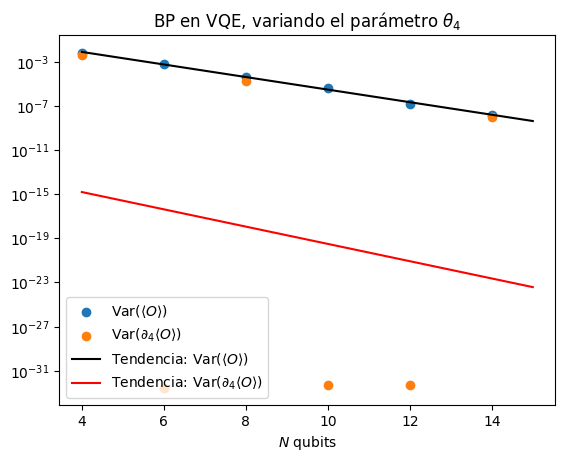


Calculando varianzas con 4 qubits.

Varianza del valor esperado: 0.005676560697920129
Varianza de la derivada: 0.004336334649075993

Calculando varianzas con 6 qubits.

Varianza del valor esperado: 0.001672111776337527
Varianza de la derivada: 0.00038330685546717554

Calculando varianzas con 8 qubits.

Varianza del valor esperado: 3.555265200167565e-05
Varianza de la derivada: 5.3898305051643424e-33

Calculando varianzas con 10 qubits.

Varianza del valor esperado: 3.259721965661478e-06
Varianza de la derivada: 5.4268083600965774e-33

Calculando varianzas con 12 qubits.

Varianza del valor esperado: 6.220997097137356e-07
Varianza de la derivada: 3.5979452849064584e-33

Calculando varianzas con 14 qubits.

Varianza del valor esperado: 8.187145484472717e-07
Varianza de la derivada: 7.630937622195368e-08

Pendiente para valor esperado: -1.0042781215640102.
R^2 para valor esperado: 0.9218142526848638.

Pendiente para derivada: -3.646381356902063.
R^2 para derivada: 0.14742308891768502.


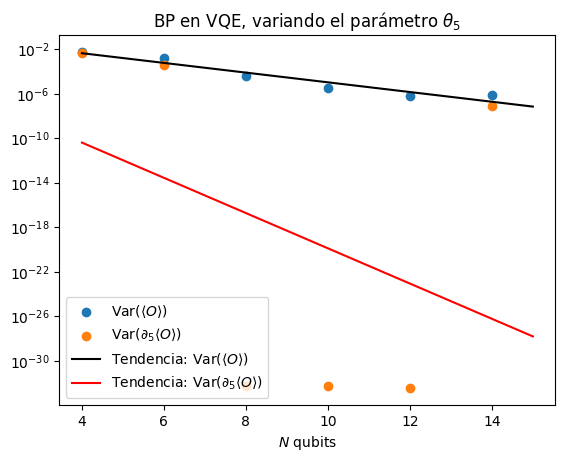


Calculando varianzas con 4 qubits.

Varianza del valor esperado: 0.0159306928910711
Varianza de la derivada: 4.45305818021439e-33

Calculando varianzas con 6 qubits.

Varianza del valor esperado: 0.0004603184956863457
Varianza de la derivada: 3.824031365645276e-05

Calculando varianzas con 8 qubits.

Varianza del valor esperado: 4.9403537677919306e-05
Varianza de la derivada: 1.2310501919242385e-05

Calculando varianzas con 10 qubits.

Varianza del valor esperado: 5.581314887530557e-06
Varianza de la derivada: 3.1470337996780164e-06

Calculando varianzas con 12 qubits.

Varianza del valor esperado: 3.3768868840243526e-07
Varianza de la derivada: 5.155637423926855e-33

Calculando varianzas con 14 qubits.

Varianza del valor esperado: 3.0188323485644235e-08
Varianza de la derivada: 1.3764813802583267e-08

Pendiente para valor esperado: -1.2816394416741461.
R^2 para valor esperado: 0.9950806274167073.

Pendiente para derivada: 1.2581150040736127.
R^2 para derivada: 0.021912193502632266.


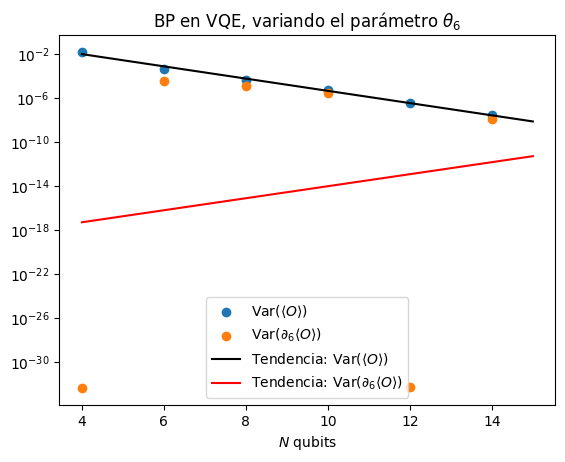


Calculando varianzas con 4 qubits.

Varianza del valor esperado: 0.008846126940880711
Varianza de la derivada: 0.004988797768071155

Calculando varianzas con 6 qubits.

Varianza del valor esperado: 0.000703470345285302
Varianza de la derivada: 0.0002721125973032849

Calculando varianzas con 8 qubits.

Varianza del valor esperado: 6.220540807266778e-05
Varianza de la derivada: 2.3516923937185213e-05

Calculando varianzas con 10 qubits.

Varianza del valor esperado: 1.4082793458682352e-05
Varianza de la derivada: 4.437342591868191e-33

Calculando varianzas con 12 qubits.

Varianza del valor esperado: 2.2775364920361255e-07
Varianza de la derivada: 9.481566994083982e-08

Calculando varianzas con 14 qubits.

Varianza del valor esperado: 1.4189937188543825e-08
Varianza de la derivada: 7.754606042132061e-09

Pendiente para valor esperado: -1.3186689093408204.
R^2 para valor esperado: 0.9854014421090193.

Pendiente para derivada: -2.2085094903768674.
R^2 para derivada: 0.10047550973306214.


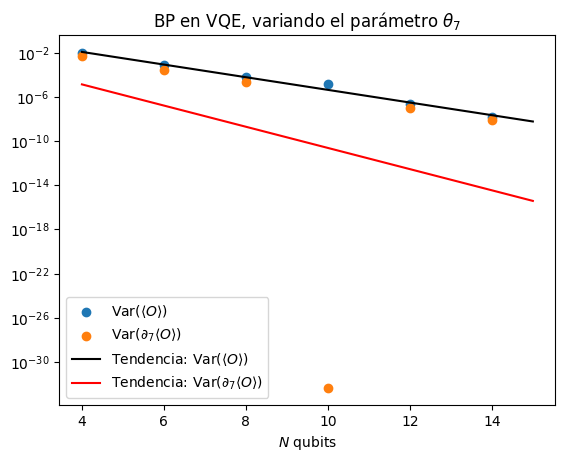


Calculando varianzas con 4 qubits.

Varianza del valor esperado: 0.006778505744525216
Varianza de la derivada: 0.004781610906162036

Calculando varianzas con 6 qubits.

Varianza del valor esperado: 0.0005282524080769082
Varianza de la derivada: 3.6089871990974225e-05

Calculando varianzas con 8 qubits.

Varianza del valor esperado: 0.000164072056986737
Varianza de la derivada: 3.367475286651202e-05

Calculando varianzas con 10 qubits.

Varianza del valor esperado: 5.3784263530689225e-06
Varianza de la derivada: 1.193213969874605e-06

Calculando varianzas con 12 qubits.

Varianza del valor esperado: 3.4112647857694476e-07
Varianza de la derivada: 5.0151215751843634e-33

Calculando varianzas con 14 qubits.

Varianza del valor esperado: 1.8170982619418427e-07
Varianza de la derivada: 1.55793155115695e-07

Pendiente para valor esperado: -1.115534562387826.
R^2 para valor esperado: 0.9757034065295058.

Pendiente para derivada: -3.5346992650383307.
R^2 para derivada: 0.2568719032107354.


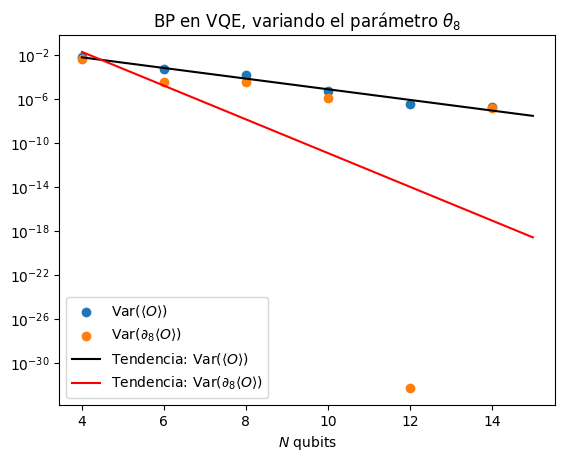


Calculando varianzas con 4 qubits.

Varianza del valor esperado: 0.014019934788323005
Varianza de la derivada: 2.8961941910700808e-33

Calculando varianzas con 6 qubits.

Varianza del valor esperado: 0.001409145910946997
Varianza de la derivada: 5.5294219075335296e-33

Calculando varianzas con 8 qubits.

Varianza del valor esperado: 0.00016212942786865783
Varianza de la derivada: 7.303213047646976e-05

Calculando varianzas con 10 qubits.

Varianza del valor esperado: 1.1462544060751847e-05
Varianza de la derivada: 9.28483122469309e-33

Calculando varianzas con 12 qubits.

Varianza del valor esperado: 2.70231235327381e-07
Varianza de la derivada: 2.6083231996814257e-08

Calculando varianzas con 14 qubits.

Varianza del valor esperado: 2.4718185863547254e-09
Varianza de la derivada: 9.091596086050802e-10

Pendiente para valor esperado: -1.5154591776103017.
R^2 para valor esperado: 0.9738738920970422.

Pendiente para derivada: 5.381778433155724.
R^2 para derivada: 0.3913375811398683.


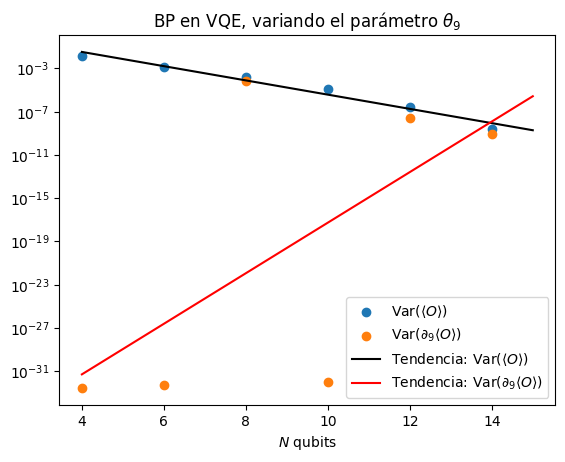


Calculando varianzas con 4 qubits.

Varianza del valor esperado: 0.007224633314283343
Varianza de la derivada: 3.306744677315109e-33

Calculando varianzas con 6 qubits.

Varianza del valor esperado: 0.0007456124231113185
Varianza de la derivada: 0.0003612888040180499

Calculando varianzas con 8 qubits.

Varianza del valor esperado: 0.0001477612854473944
Varianza de la derivada: 5.638747368921561e-06

Calculando varianzas con 10 qubits.

Varianza del valor esperado: 1.0784698059916407e-05
Varianza de la derivada: 2.1967338308000266e-06

Calculando varianzas con 12 qubits.

Varianza del valor esperado: 9.221674706502782e-08
Varianza de la derivada: 2.488609636939411e-33

Calculando varianzas con 14 qubits.

Varianza del valor esperado: 4.160013109590397e-09
Varianza de la derivada: 1.5445630680860994e-09

Pendiente para valor esperado: -1.44926245958034.
R^2 para valor esperado: 0.9704207560056007.

Pendiente para derivada: 1.0016878872599921.
R^2 para derivada: 0.013668412553018797.


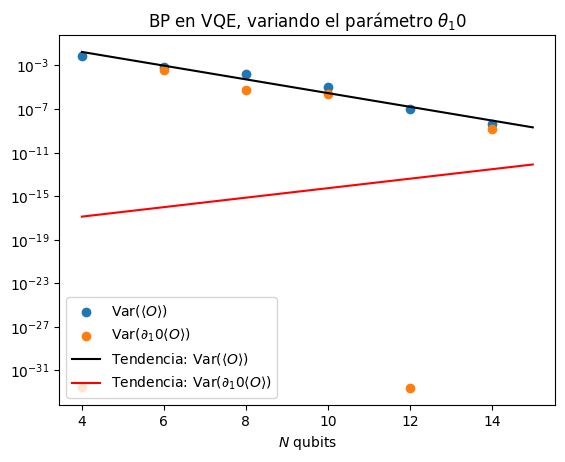


Calculando varianzas con 4 qubits.

Varianza del valor esperado: 0.011417603409897028
Varianza de la derivada: 0.0027714453390711878

Calculando varianzas con 6 qubits.

Varianza del valor esperado: 0.0007988408092024124
Varianza de la derivada: 0.0007313912326567438

Calculando varianzas con 8 qubits.

Varianza del valor esperado: 0.00010122447662865994
Varianza de la derivada: 2.1708283438413706e-06

Calculando varianzas con 10 qubits.

Varianza del valor esperado: 5.157917639935157e-06
Varianza de la derivada: 1.7113091220338267e-07

Calculando varianzas con 12 qubits.

Varianza del valor esperado: 8.265079851174332e-07
Varianza de la derivada: 4.194213195688746e-33

Calculando varianzas con 14 qubits.

Varianza del valor esperado: 4.773008114677993e-08
Varianza de la derivada: 3.591782309084419e-33

Pendiente para valor esperado: -1.2217636438282846.
R^2 para valor esperado: 0.9973635311858426.

Pendiente para derivada: -7.8374988874992795.
R^2 para derivada: 0.7734624231882359.


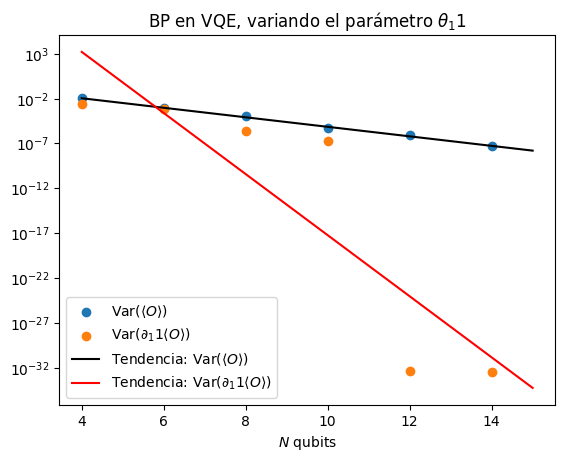

In [4]:
data_global = []

for i in np.linspace(0,11,12):
    data_global.append(var.variance_vs_nQubits(build_ala_ansatz, 4, 15, base_observable = "global_observable", index=int(i), do_regress=True, only_even_qubits=True))


Calculando varianzas con 4 qubits.

Varianza del valor esperado: 0.00981465778092126
Varianza de la derivada: 8.281498760865114e-33

Calculando varianzas con 6 qubits.

Varianza del valor esperado: 0.0006003010453735358
Varianza de la derivada: 0.00033209439018759166

Calculando varianzas con 8 qubits.

Varianza del valor esperado: 0.00011048182343782712
Varianza de la derivada: 2.795076088280428e-05

Calculando varianzas con 10 qubits.

Varianza del valor esperado: 3.4934621085450114e-06
Varianza de la derivada: 8.947558638603589e-07

Calculando varianzas con 12 qubits.

Varianza del valor esperado: 1.96711098516754e-06
Varianza de la derivada: 3.7500294827543247e-07

Calculando varianzas con 14 qubits.

Varianza del valor esperado: 1.8630648384608958e-08
Varianza de la derivada: 1.3677742524128765e-08

Calculando varianzas con 16 qubits.

Varianza del valor esperado: 8.042683849000797e-08
Varianza de la derivada: 4.745491382970149e-33

Pendiente para valor esperado: -1.0700921595683

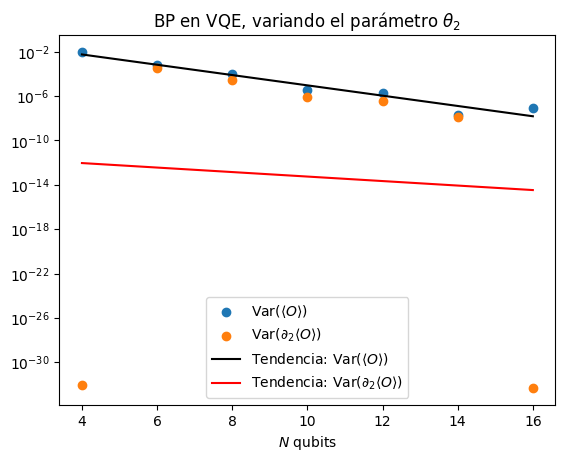

In [8]:
data_global_theta2 = var.variance_vs_nQubits(build_ala_ansatz, 4, 16, base_observable = "global_observable", index=2, do_regress=True, only_even_qubits=True)

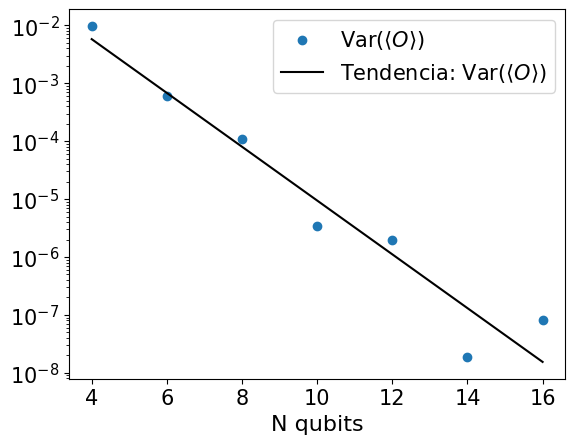

In [12]:
# Datos
x = data_global_theta2["n_qubits"]
y = data_global_theta2["var_value"]

# Transformación logarítmica del eje y
log_y = np.log(y)

# Regresión lineal
slope, intercept, r_value, p_value, std_err = linregress(x, log_y)

# Recta ajustada
x_fit = np.linspace(min(x), max(x), 100)
y_fit = np.exp(slope * x_fit + intercept)

# Plot
plt.scatter(x, y, label=r"Var($\langle O\rangle$)")
plt.plot(x_fit, y_fit, color="black", linestyle="-", label=fr"Tendencia: Var($ \langle O\rangle$)")
plt.xlabel("N qubits", size=16)
plt.yscale("log")
plt.xticks(fontsize="15")
plt.yticks(fontsize="15")
plt.legend(loc="upper right", bbox_to_anchor=(1.0, 1.0), fontsize="15")
plt.show()



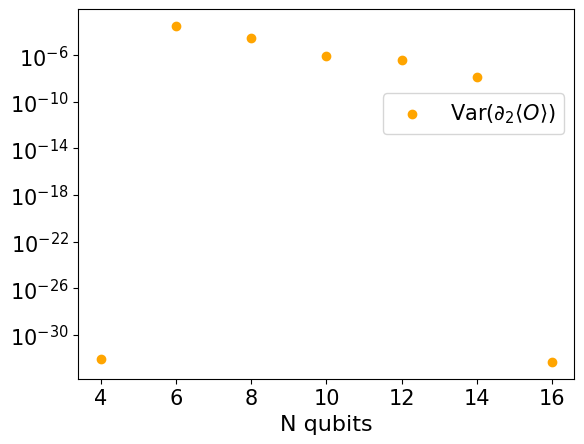

In [14]:
# Datos
x = data_global_theta2["n_qubits"]
y = data_global_theta2["var_deriv"]

# Transformación logarítmica del eje y
log_y = np.log(y)

# Regresión lineal
slope, intercept, r_value, p_value, std_err = linregress(x, log_y)

# Recta ajustada
x_fit = np.linspace(min(x), max(x), 100)
y_fit = np.exp(slope * x_fit + intercept)

# Plot
plt.scatter(x, y, color="orange", label=r"Var($\partial_2 \langle O\rangle$)")
plt.xlabel("N qubits", size=16)
plt.yscale("log")
plt.xticks(fontsize="15")
plt.yticks(fontsize="15")
plt.legend(loc="upper right", bbox_to_anchor=(1.0, 0.8), fontsize="15")
plt.show()

